In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
import typing
plt.style.use('ggplot')

In [2]:
datos=pd.read_csv('Datos\heart.csv')
datos.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Em este Conjunto de datos no interesa pronosticar enfermedades cardiovasculares. Para ello emplearemos una regresion logística contruida desde cero.

Las variables en el conjunto de datos son las siguientes:
* Age: edad del paciente [años]
* Sex: sexo del paciente [M: Masculino, F: Femenino]
* ChestPainType: tipo de dolor torácico [TA: angina típica, ATA: angina atípica, NAP: dolor no anginoso, ASY: asintomático]
* RestingBP	: presión arterial en reposo [mm Hg]
* Colesterol: colesterol sérico [mm/dl]
* FastingBS: azúcar en sangre en ayunas [1: si BS en ayunas > 120 mg/dl, 0: en caso contrario]
* Resting resultados del electrocardiograma en reposo [Normal: normal, ST: con anomalías en la onda ST-T (inversión de la onda T y/o elevación o depresión del ST > 0,05 mV), HVI: hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes]
* MaxHR: frecuencia cardíaca máxima alcanzada [Valor numérico entre 60 y 202]
* ExerciseAngina: angina inducida por el ejercicio [Y: Sí, N: No]
* Oldpeak: oldpeak = ST [Valor numérico medido en depresión]
* ST_Slope: la pendiente del segmento ST del ejercicio máximo [Arriba: pendiente ascendente, Plana: plana, Abajo: pendiente descendente]
* HeartDisease: clase de salida [1: enfermedad cardíaca, 0: normal]

In [3]:
datos.shape

(918, 12)

In [4]:
datos.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
datos.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

# Preprocesamiento

In [6]:
datos['Sex']=pd.factorize(datos['Sex'])[0]
datos['ChestPainType']=pd.factorize(datos['ChestPainType'])[0]
datos['RestingECG']=pd.factorize(datos['RestingECG'])[0]
datos['ExerciseAngina']=pd.factorize(datos['ExerciseAngina'])[0]
datos['ST_Slope']=pd.factorize(datos['ST_Slope'])[0]

In [7]:
datos.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,1.452070,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.851832,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,1.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,2.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,0.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


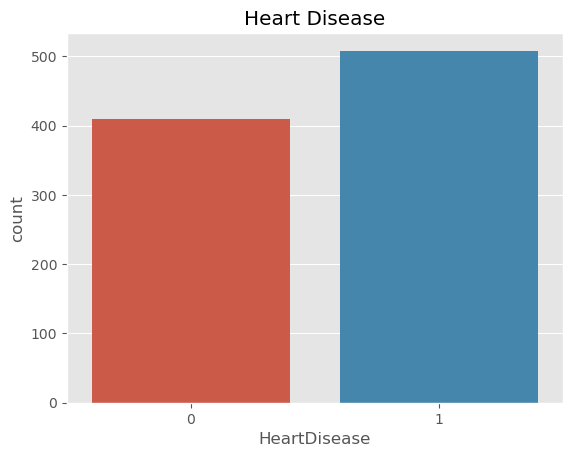

In [8]:
sns.countplot(x=datos['HeartDisease'])
plt.title('Heart Disease')
plt.show()

De acuerdo a los resultados de arriba se debe realizar un balanceo de clases con el objetivo de que nuestro modelo no quede sesgado

In [9]:
es=StandardScaler()

In [10]:
x=datos.drop(['HeartDisease'],axis=1)
y=datos['HeartDisease']
X=np.array(x)
Y=np.array(y)

In [11]:
X=es.fit_transform(X)

In [12]:
smote=SMOTE(k_neighbors=5,random_state=42)#Se crea una instancia para realizar el balanceo

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [14]:
x_trainb,y_trainb=smote.fit_resample(x_train,y_train)#se crea un conjunto de entrenamiento con clases balanceadas

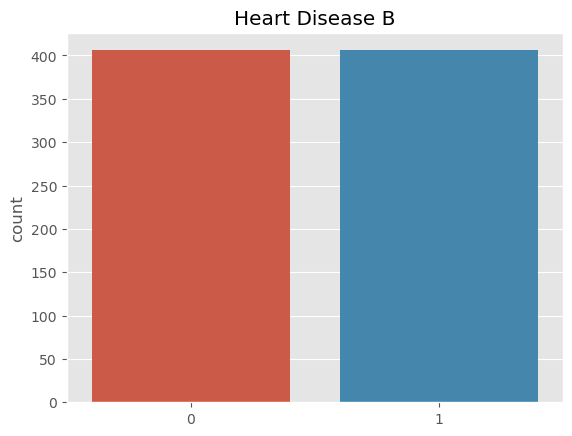

In [23]:
sns.countplot(x=y_trainb)
plt.title('Heart Disease B')
plt.show()

# Creación del modelo desde cero

In [15]:
class Logistic_Regression:
    coef:float
    
    def sigmoid(self,X): #funcion sigmoide que nos permitira obtener probabilidades entre 1 y 0
        return 1/(1+np.exp(-X)) 
    
    def log_logic(self,x,y,coef):
        if y==1.0:
            return -np.log(self.sigmoid(np.dot(x,coef)))
        else:
            return -np.log(1-self.sigmoid(np.dot(x,coef)))
    
    def sum_loss(self,x_train,y_train,coef):
        return sum(self.log_logic(x_t,y_t,coef) for x_t,y_t in zip(x_train,y_train))    

    def gradient(self,x_train,y_train,coef):#calcula el error de la funcion de costo
        x=np.dot(x_train,coef)
        error=self.sigmoid(x)-y_train       
        return error
    
    def det_coef(self,error,x_train,coef,alpha):# varia los coeficientes del modelo coo base en el error
        coef-=(error*x_train)*alpha#se repite el proceso hasta n que es el numero dee registro de entrenamiento
        return coef
    
    def fit(self,x_train,y_train,epochs=1000,alpha=0.001,random_state=None):#entrena el modelo de acuerdo a los datos
        np.random.seed(random_state)
        self.coef=np.random.randn(x_train.shape[1]+1)
        #para el intercepto 
        x_tint=np.ones([x_train.shape[0]]).reshape(-1,1)
        x_train=np.concatenate((x_tint,x_train),axis=1)
        with tqdm.trange(epochs) as t:    
            
            for z in t:
                for xt,yt in zip(x_train,y_train):
                    error=self.gradient(xt,yt,self.coef)            
                    self.coef=self.det_coef(error,xt,self.coef,alpha)
                self.coef=self.coef/len(x_train)
                t.set_description(f"Loss: {self.sum_loss(x_train,y_train,self.coef)}")     
                    
    def odds(self,var_name=None):# convierte los coeficientes ya que estan en escala logaritmica
        if var_name==None:
            tab=pd.DataFrame({'Variable':[f'x{i}' for i in range(0,len(self.coef)-1)],'Coeficientes':np.exp(self.coef[1:])})
            return print(tab)
        else:
            tab=pd.DataFrame({'Variable':var_name,'Coeficientes':np.exp(self.coef[1:])})
            return print(tab)
    
    def predict_prob(self,x_test):#da la probabilidad de que ocurra un evento
        x_test=np.concatenate((np.ones(x_test.shape[0]).reshape(-1,1),x_test),axis=1)
        return self.sigmoid(np.dot(x_test,self.coef))
    
    def predict(self,x_test):#asigna la etiqueta de acuerdo a la probabilidad
        x_test=np.concatenate((np.ones(x_test.shape[0]).reshape(-1,1),x_test),axis=1)
        return np.where(self.sigmoid(np.dot(x_test,self.coef))>0.5,1,0)

# Creación de la instancia y entrenamiento

In [16]:
modelo_rl=Logistic_Regression()

In [17]:
modelo_rl.fit(x_trainb,y_trainb)

Loss: 562.6129304690883:   1%|          | 6/1000 [00:00<02:20,  7.09it/s]

Loss: 562.6129304690883: 100%|██████████| 1000/1000 [01:48<00:00,  9.18it/s]


# Evaluación de los resultados

In [18]:
modelo_rl.odds(x.columns.tolist())# aumentos de las posbilidades de subir enfermedades cardio vasculares

          Variable  Coeficientes
0              Age      1.000095
1              Sex      0.999886
2    ChestPainType      1.000177
3        RestingBP      1.000037
4      Cholesterol      0.999900
5        FastingBS      1.000108
6       RestingECG      1.000017
7            MaxHR      0.999845
8   ExerciseAngina      1.000185
9          Oldpeak      1.000159
10        ST_Slope      1.000225


In [19]:
y_pred=modelo_rl.predict(x_test)

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        82
           1       0.89      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



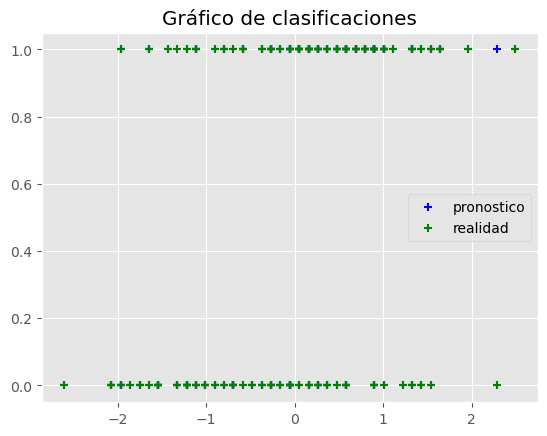

In [21]:
plt.scatter(x_test[:,0],y_pred[:],marker='+',color='blue',label='pronostico')
plt.scatter(x_test[:,0],y_test[:],marker='+',color='green',label='realidad')
plt.title('Gráfico de clasificaciones')
plt.legend(loc='center right')
plt.show()